In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_figure = cv.imread('./imgs/figures.jpg')
img_lena_G = cv.imread('./imgs/lenaG.png')
img_lena_S = cv.imread('./imgs/lenaS.png')
img_zebra = cv.imread('./imgs/zebra.jpg')

In [47]:

def solve_media_mask(x, y, offset, img, mask):
    x_in_img = x - offset
    y_in_img = y - offset
    mask_n = len(mask)
    media = 0
    for i in range(mask_n):
        for j in range(mask_n):
            #add sum for each channel BGR images
            media += img[x_in_img + i, y_in_img + j, 0] * mask[i,j]
    return media // (mask_n**2)

def solve_mediana_mask(x, y, offset, img, mask):
    x_in_img = x - offset
    y_in_img = y - offset
    mask_n = len(mask)
    media = 0
    arr = []
    for i in range(mask_n):
        for j in range(mask_n):
            #add sum for each channel BGR images
            arr.append(img[x_in_img + i, y_in_img + j, 0])
    arr.sort()
    pos_middle = (mask_n ** 2) // 2
    return arr[pos_middle]

def solve_min_mask(x, y, offset, img, mask):
    x_in_img = x - offset
    y_in_img = y - offset
    mask_n = len(mask)
    media = 0
    arr = []
    for i in range(mask_n):
        for j in range(mask_n):
            #add sum for each channel BGR images
            arr.append(img[x_in_img + i, y_in_img + j, 0])
    arr.sort()
    return arr[0]

def solve_max_mask(x, y, offset, img, mask):
    x_in_img = x - offset
    y_in_img = y - offset
    mask_n = len(mask)
    media = 0
    arr = []
    for i in range(mask_n):
        for j in range(mask_n):
            #add sum for each channel BGR images
            arr.append(img[x_in_img + i, y_in_img + j, 0])
    arr.sort()
    return arr[-1]

def apply_mask(img, mask, func):
    h, w, c = img.shape
    offset = mask.shape[0] // 2
    img_result = np.ones((h - offset*2, w - offset*2, 3), dtype = int)
    for i in range(offset, h - offset):
        for j in range(offset, w - offset):
            val = func(i, j, offset, img, mask)
            if val > 255 or val < 0:
                print(val)
            for k in range(c):
                img_result[i-offset, j-offset, k] = val
    return img_result

In [85]:
def test(img, func, name, img_name):
    plt.rcParams['figure.figsize'] = [10,10]
    fig, axes = plt.subplots(nrows=1, ncols=4)
    messages = [img_name+'3x3 '+name, img_name+'5x5 '+name, img_name+'7x7 '+name, img_name+'original']
    mask = np.ones((3,3,), dtype=int)
    img_result = apply_mask(img, mask, func)
    mask = np.ones((5,5,), dtype=int)
    img_result2 = apply_mask(img, mask, func)
    mask = np.ones((7,7,), dtype=int)
    img_result3 = apply_mask(img, mask, func)
    images = [img_result, img_result2, img_result3, img]
    for ax, message, image in zip(axes.flat, messages, images):
        ax.imshow(image)
        ax.set(title= message)
        ax.axis('off')
        cv.imwrite(message+'.jpg', image)
    plt.show()

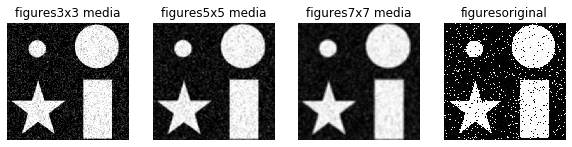

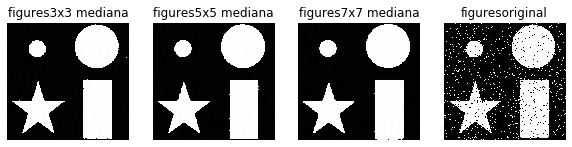

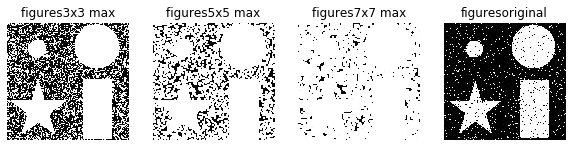

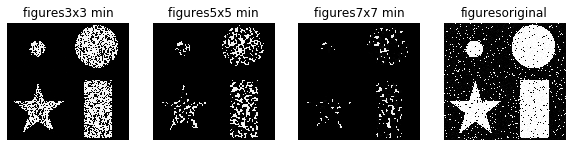

In [87]:
test(img_figure, solve_media_mask, 'media', 'figures')
test(img_figure, solve_mediana_mask, 'mediana', 'figures')
test(img_figure, solve_max_mask, 'max', 'figures')
test(img_figure, solve_min_mask, 'min', 'figures')

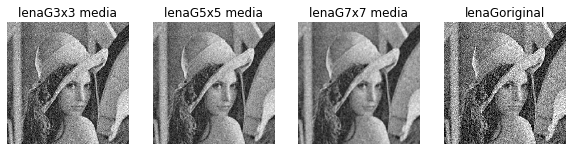

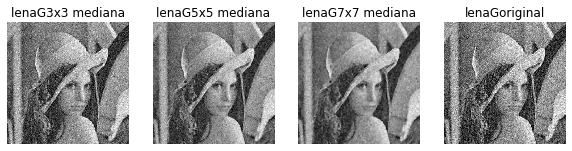

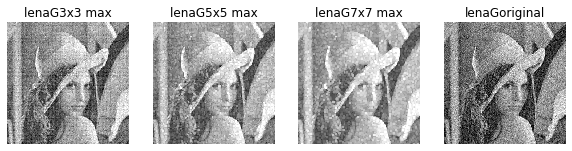

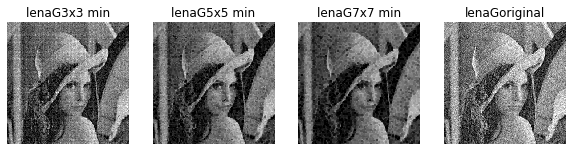

In [88]:
test(img_lena_G, solve_media_mask, 'media','lenaG')
test(img_lena_G, solve_mediana_mask, 'mediana','lenaG')
test(img_lena_G, solve_max_mask, 'max','lenaG')
test(img_lena_G, solve_min_mask, 'min','lenaG')

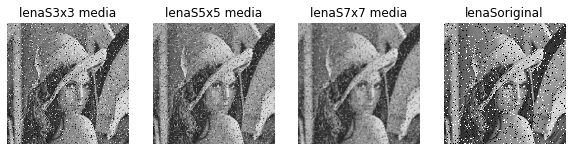

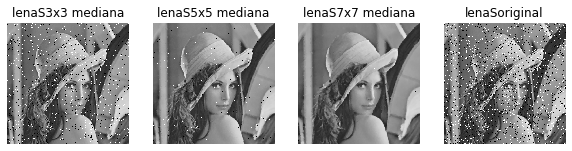

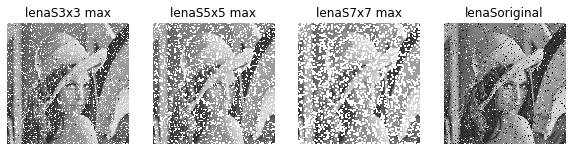

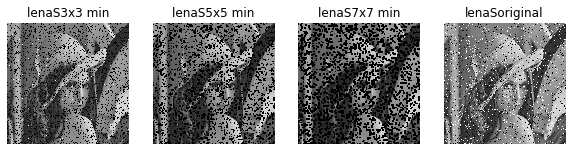

In [89]:
test(img_lena_S, solve_media_mask, 'media', 'lenaS')
test(img_lena_S, solve_mediana_mask, 'mediana', 'lenaS')
test(img_lena_S, solve_max_mask, 'max', 'lenaS')
test(img_lena_S, solve_min_mask, 'min', 'lenaS')

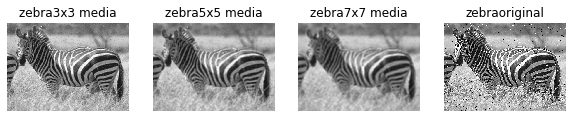

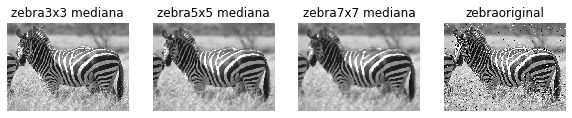

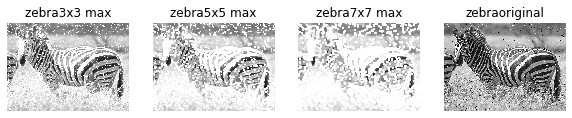

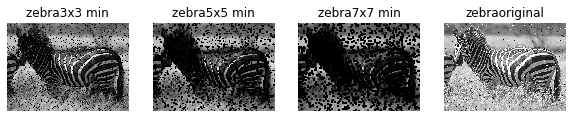

In [90]:
test(img_zebra, solve_media_mask, 'media', 'zebra')
test(img_zebra, solve_mediana_mask, 'mediana', 'zebra')
test(img_zebra, solve_max_mask, 'max', 'zebra')
test(img_zebra, solve_min_mask, 'min', 'zebra')